In [1]:
library(ggplot2)

In [2]:
meta_all <- readRDS("qc_mRNA_protein_pca_umap_clus_meta_all_site_anno_hpca_2020-03-31.rds")
# dim(meta_all)

In [266]:
# # Load scrublet results from Joseph
# # /data/srlab1/jmears/jupyter/2020-4-9-AMPCITESEQ/ScrubletDetection.ipynb
# library(RcppCNPy)
# doublets <- npyLoad("/data/srlab1/jmears/jupyter/2020-4-9-AMPCITESEQ/doublet_scores_amp_all.npy")
# meta_all$all_doublets <- doublets

## Visualize doublet score for each sample

In [3]:
doublet_per_sample <- readRDS("/data/srlab1/public/srcollab/AMP_Phase_2/scrublet/doublet_scores_all_cells.rds")
doublet_per_sample$sample <- gsub("\\_.*","", doublet_per_sample$cell)
dim(doublet_per_sample)
# doublet_per_sample[1:4,]
# table(doublet_per_sample$sample)

[1] 403596      3

In [4]:
all(meta_all$cell == doublet_per_sample$cell)
meta_all$sample_doublets <- doublet_per_sample$doublet_score

[1] TRUE

In [5]:
require(gdata)
para <- read.xls("/data/srlab1/public/srcollab/AMP_Phase_2/scrublet/scrub_par.xls", sheet = 1, header = TRUE)
para$expected_proportion <- para$expected_proportion * 100
para$estimated_proportion <- para$estimated_proportion * 100
dim(para)
para[1:4,]


# Merge doublet_score with threshold 
meta_all <- merge(meta_all, para, all.x=TRUE)
meta_all[1:4,]

Loading required package: gdata
gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.

gdata: Unable to load perl libaries needed by read.xls()
gdata: to support 'XLSX' (Excel 2007+) files.

gdata: Run the function 'installXLSXsupport()'
gdata: to automatically download and install the perl
gdata: libaries needed to support Excel XLS and XLSX formats.

Attaching package: ‘gdata’

The following object is masked from ‘package:stats’:

    nobs

The following object is masked from ‘package:utils’:

    object.size

The following object is masked from ‘package:base’:

    startsWith



[1] 85  5

sample  thresh_doublet_score cell_number expected_proportion
1 BRI-583 0.21                 14599       11.7               
2 BRI-585 0.54                  6466        5.2               
3 BRI-587 0.16                 13412       10.7               
4 BRI-601 0.25                 14434       11.5               
  estimated_proportion
1 19.0                
2 12.7                
3 23.0                
4 14.8

sample  cell                     nUMI  nGene percent_mito percent.ribo
1 BRI-399 BRI-399_AAACCCAAGTCATTGC  7959 2497  0.15165222   0.13041839  
2 BRI-399 BRI-399_AAACCCAAGTGAATAC  8601 3055  0.06522497   0.07836298  
3 BRI-399 BRI-399_AAACCCACAGTCCGTG 13897 3833  0.07922573   0.14082176  
4 BRI-399 BRI-399_AAACCCAGTAGGAGGG 33644 5515  0.08474022   0.18550113  
  UMAP1     UMAP2     PC1        PC2           ...
1 6.6981000 -5.381405 -0.3571995 -0.0390370210 ...
2 0.4673366 -9.940085 -0.2261091 -0.0163840411 ...
3 6.9872802 -7.038188 -0.4850761  0.0008679194 ...
4 4.7951625  3.897222  0.2578570  0.3665536689 ...
  hpca_anno                     hpca_anno_fine                site      
1 Chondrocytes:MSC-derived      Chondrocytes:MSC-derived      Pittsburgh
2 iPS_cells:adipose_stem_cells  iPS_cells:adipose_stem_cells  Pittsburgh
3 Smooth_muscle_cells:bronchial Smooth_muscle_cells:bronchial Pittsburgh
4 Monocyte:CD16-                Monocyte:CD16-                Pittsburgh
  res_0.60_adt res_0.80_adt sample_doublets thresh_doublet_score cell_number
1  0            0           0.02752792      0.23                 11905      
2  4           12           0.03111027      0.23                 11905      
3 11           11           0.02584575      0.23                 11905      
4  5           11           0.03604833      0.23                 11905      
  expected_proportion estimated_proportion
1 9.5                 11.9                
2 9.5                 11.9                
3 9.5                 11.9                
4 9.5                 11.9

In [6]:
meta_all$double_binary <- meta_all$sample_doublets > meta_all$thresh_doublet_score

In [7]:
meta_all$sample_doublets_norm <- with(meta_all, sample_doublets / ave(sample_doublets, sample, FUN = max))

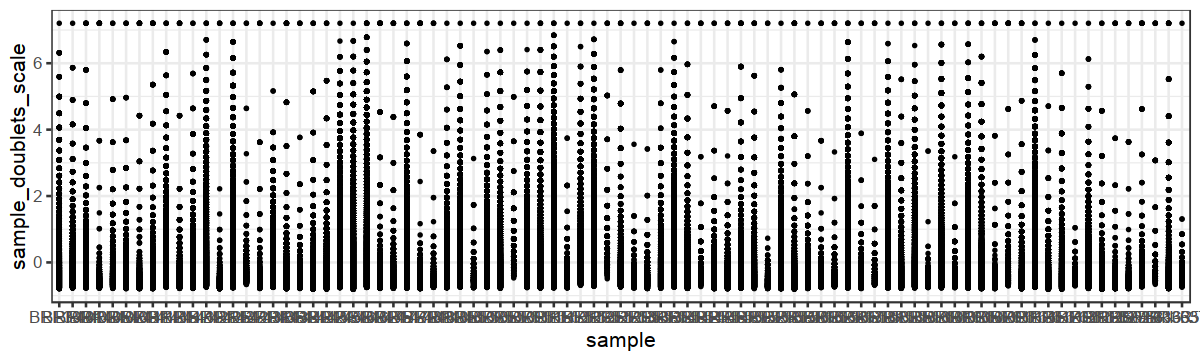

In [282]:
meta_all$sample_doublets_scale <- scale(meta_all$sample_doublets_norm)

options(repr.plot.height = 3, repr.plot.width = 10)
ggplot(meta_all, aes(sample, sample_doublets_scale)) +
#   facet_wrap( ~ sample, ncol = 12) +
  geom_point(size = 0.5) +
  theme_bw(base_size = 12)

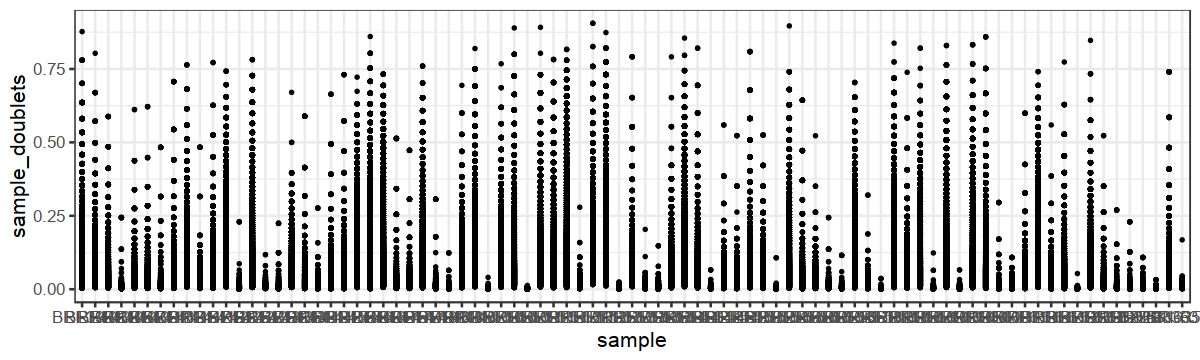

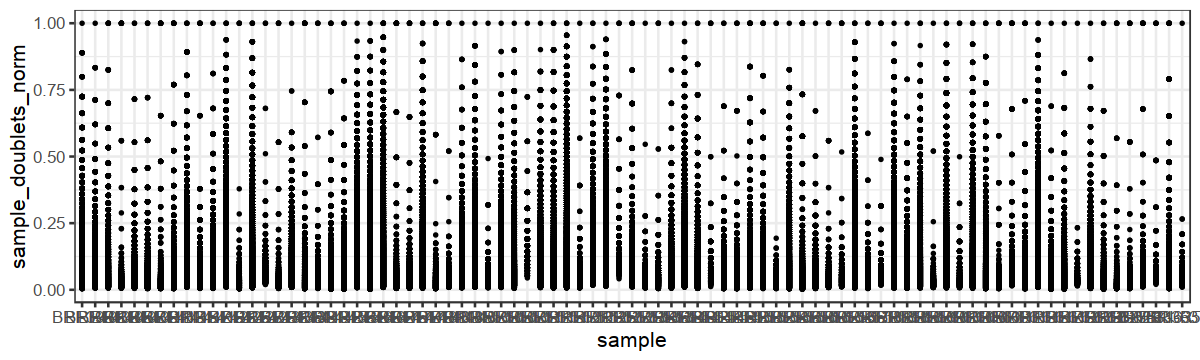

In [273]:
options(repr.plot.height = 3, repr.plot.width = 10)
ggplot(meta_all, aes(sample, sample_doublets)) +
#   facet_wrap( ~ sample, ncol = 12) +
  geom_point(size = 0.5) +
  theme_bw(base_size = 12)

ggplot(meta_all, aes(sample, sample_doublets_norm)) +
#   facet_wrap( ~ sample, ncol = 12) +
  geom_point(size = 0.5) +
  theme_bw(base_size = 12)

In [10]:
# Save the meta_all with doublets score
# saveRDS(meta_all, "meta_all_doublet_score_2020-04-27.rds")

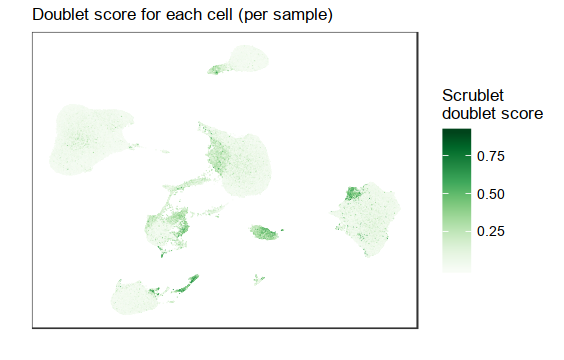

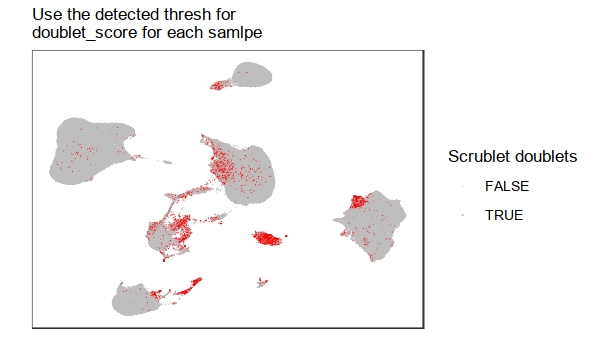

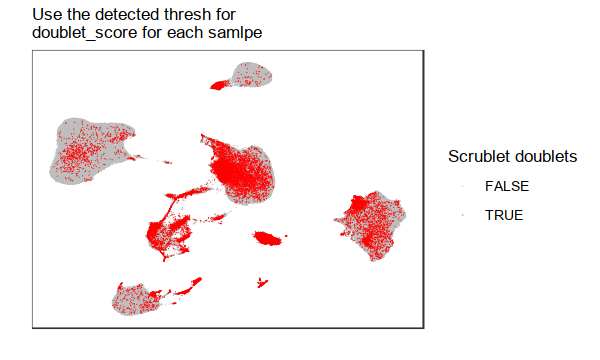

In [226]:
options(repr.plot.height = 3, repr.plot.width = 4.7)
ggplot() +
  geom_point(
    data = meta_all[sample(nrow(meta_all)),],
#     data = meta_all[order(meta_all$sample_doublets),],
    mapping = aes_string(x = "harmonized_UMAP1", y = "harmonized_UMAP2", fill = "sample_doublets"),
    size = 0.05, stroke = 0.0001, shape = 21
  ) +
  scale_fill_gradientn(
      colours = colorRampPalette(RColorBrewer::brewer.pal(9, "Greens"))(9)[1:9],
      name = "Scrublet \ndoublet score"
  ) +
  labs(
      x = "",
      y = "",
      title = "Doublet score for each cell (per sample)"
      ) +
  theme_bw(base_size = 10) +
  theme(
#     legend.position = "none",
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=10)
  )



options(repr.plot.height = 3, repr.plot.width = 5)
ggplot() +
  geom_point(
#     data = meta_all[order(meta_all$double_binary),],
    data = meta_all[sample(nrow(meta_all)),],
    mapping = aes_string(x = "harmonized_UMAP1", y = "harmonized_UMAP2", fill = "double_binary"),
    size = 0.05, stroke = 0.0001, shape = 21
  ) +
  scale_fill_manual(values = c("grey", "red"), name = "Scrublet doublets") +
  labs(
      x = "",
      y = "",
      title = "Use the detected thresh for \ndoublet_score for each samlpe"
      ) +
  theme_bw(base_size = 10) +
  theme(
#     legend.position = "none",
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=10)
  )

ggplot() +
  geom_point(
    data = meta_all[order(meta_all$double_binary),],
#     data = meta_all[sample(nrow(meta_all)),],
    mapping = aes_string(x = "harmonized_UMAP1", y = "harmonized_UMAP2", fill = "double_binary"),
    size = 0.05, stroke = 0.0001, shape = 21
  ) +
  scale_fill_manual(values = c("grey", "red"), name = "Scrublet doublets") +
  labs(
      x = "",
      y = "",
      title = "Use the detected thresh for \ndoublet_score for each samlpe"
      ) +
  theme_bw(base_size = 10) +
  theme(
#     legend.position = "none",
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=10)
  )

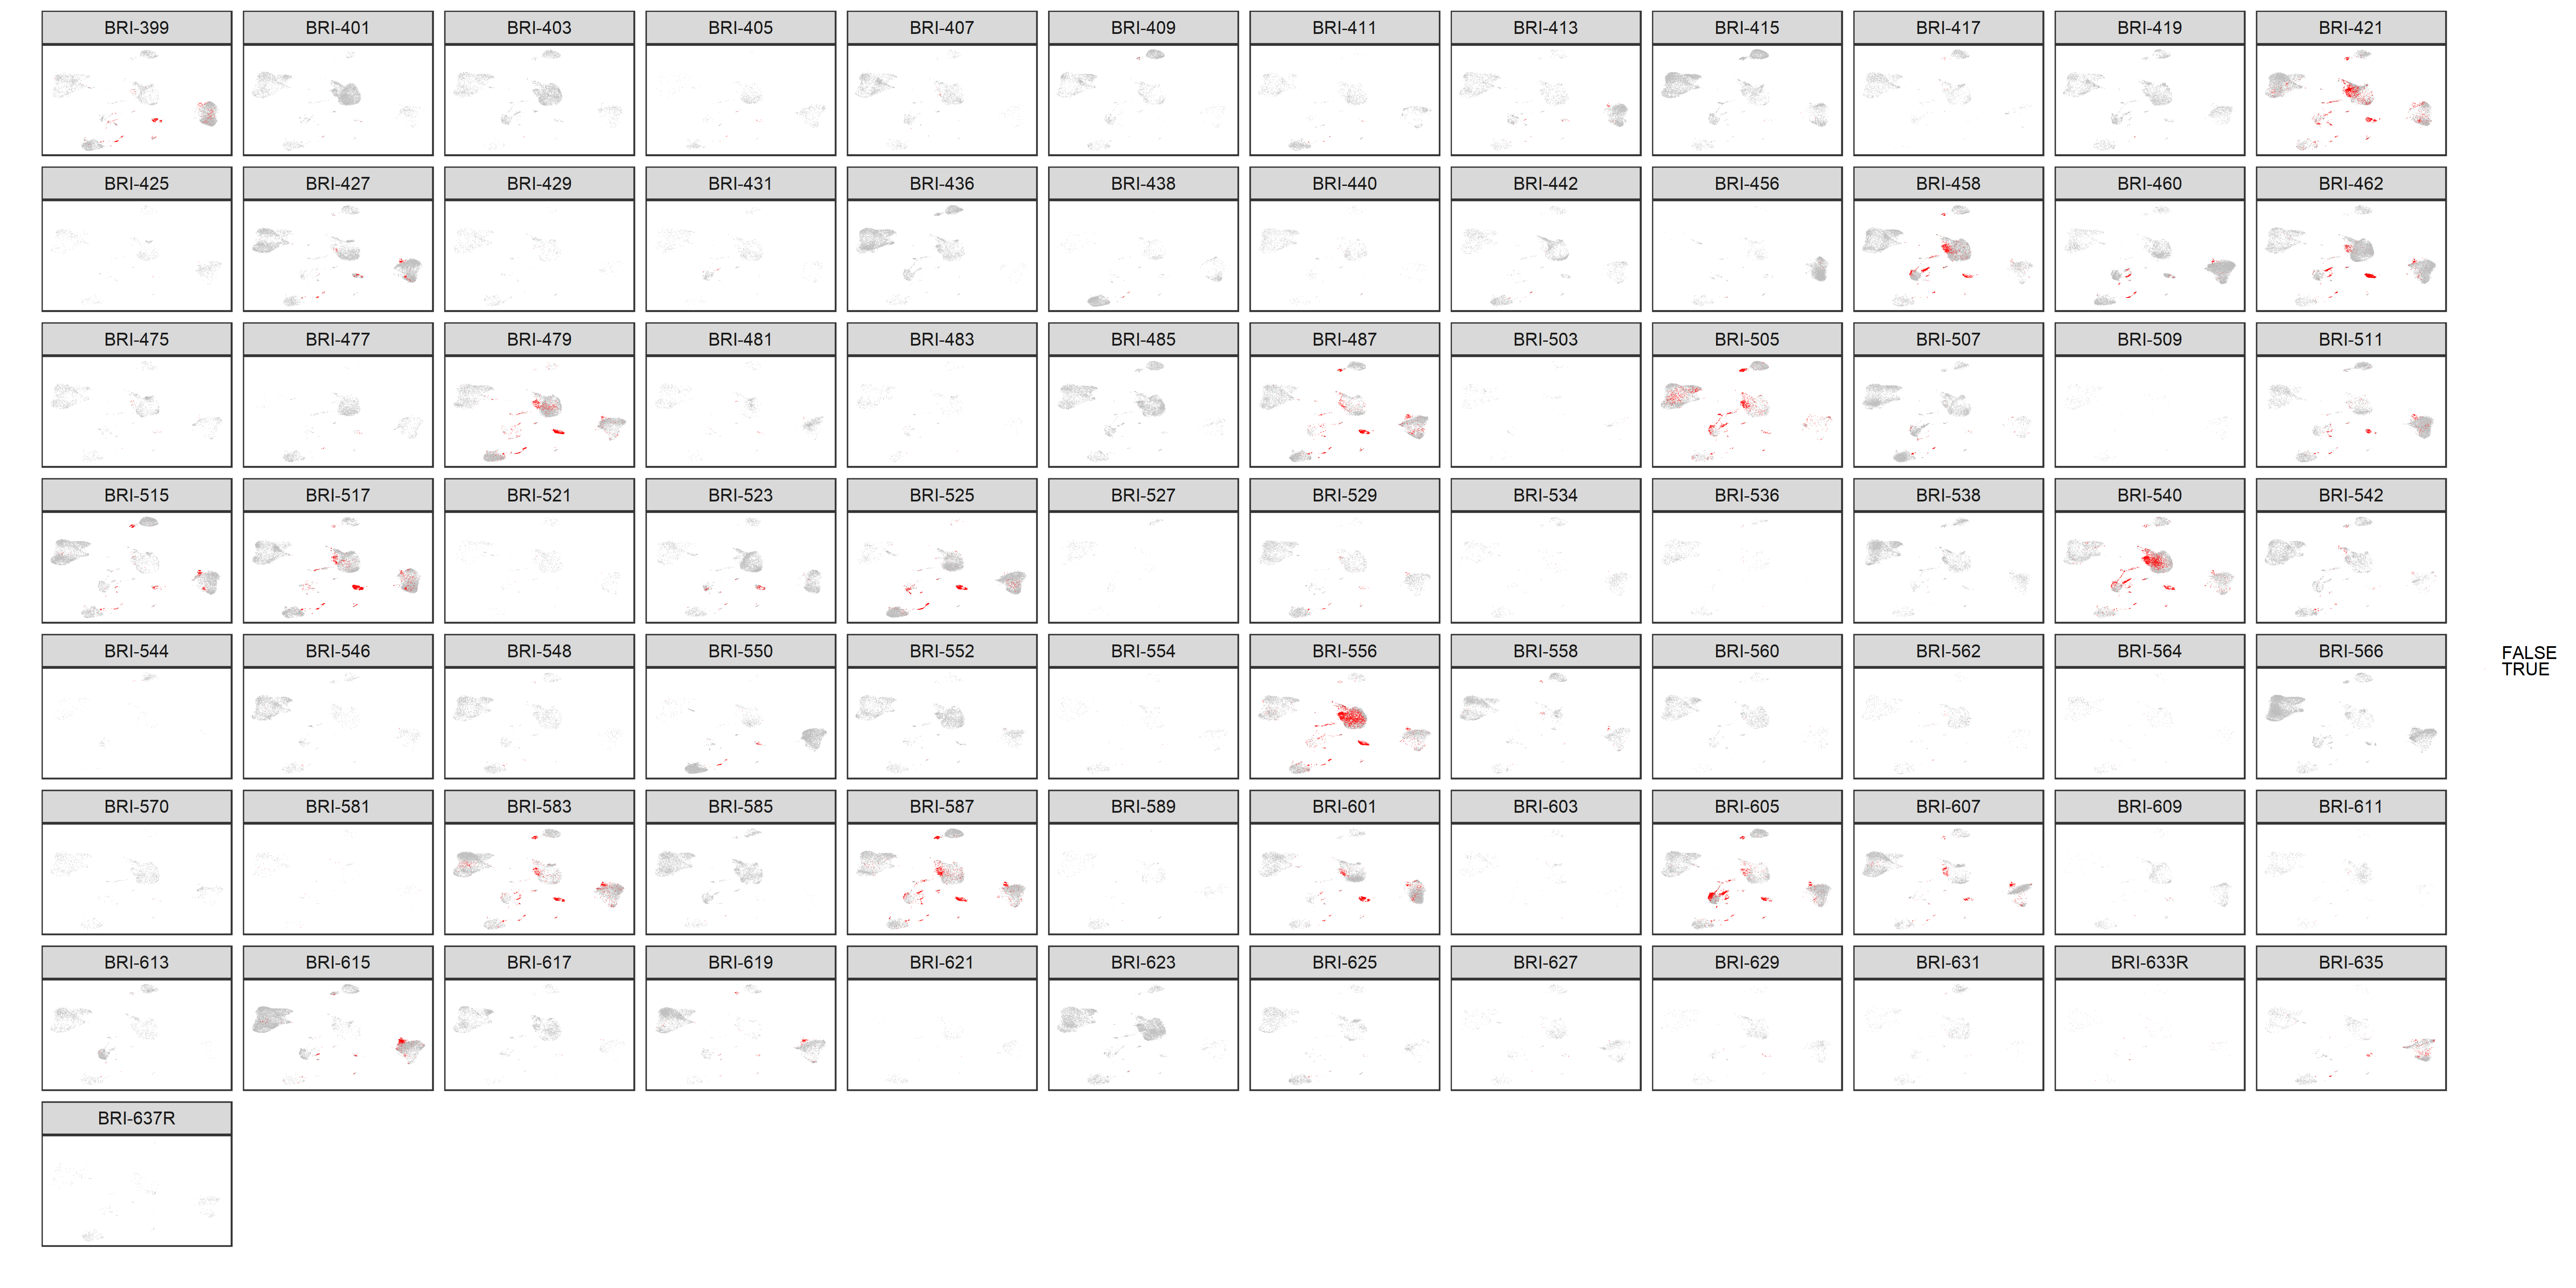

In [224]:
options(repr.plot.height = 25, repr.plot.width = 50)
ggplot() +
  geom_point(
    data = meta_all[order(meta_all$double_binary),],
    mapping = aes_string(x = "harmonized_UMAP1", y = "harmonized_UMAP2", fill = "double_binary"),
    size = 0.05, stroke = 0.0001, shape = 21
  ) +
  facet_wrap( ~ sample, ncol = 12) +
  scale_fill_manual(values = c("grey", "red"), name = "") +
  labs(
      x = "",
      y = ""
      ) +
  theme_bw(base_size = 30) +
  theme(
#     legend.position = "none",
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=20)
  )

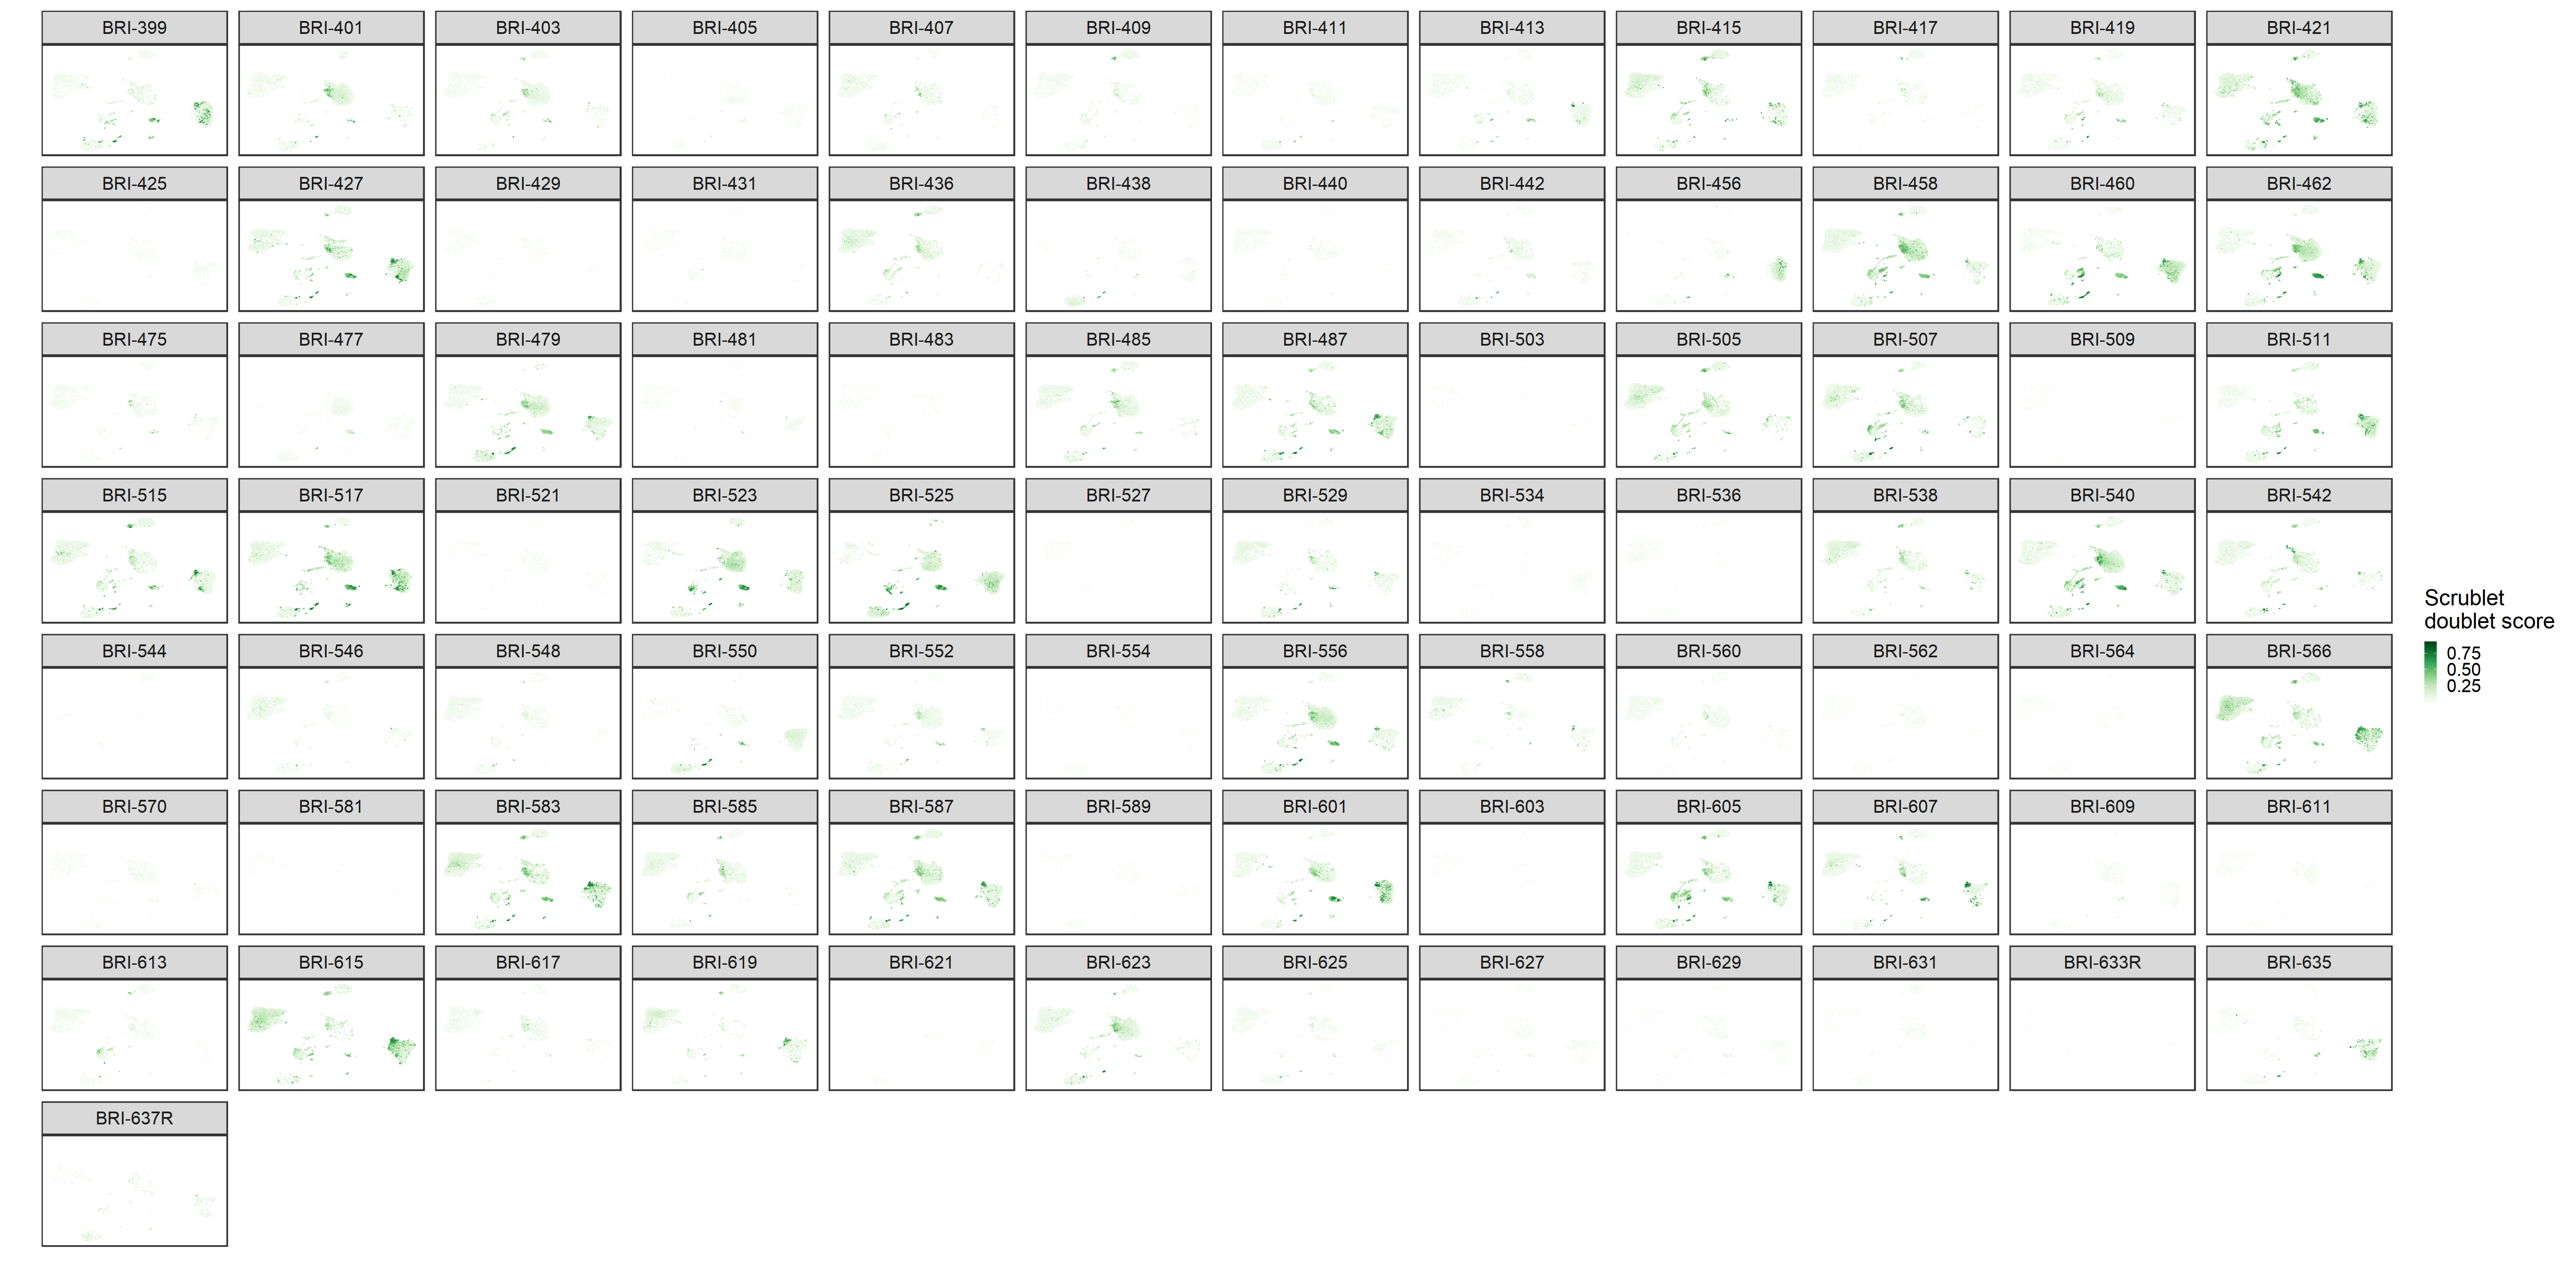

In [76]:
options(repr.plot.height = 25, repr.plot.width = 50)
ggplot() +
  geom_point(
    data = meta_all[order(meta_all$sample_doublets),],
    mapping = aes_string(x = "harmonized_UMAP1", y = "harmonized_UMAP2", fill = "sample_doublets"),
    size = 0.5, stroke = 0.0001, shape = 21
  ) +
  facet_wrap( ~ sample, ncol = 12) +
  scale_fill_gradientn(
      colours = colorRampPalette(RColorBrewer::brewer.pal(9, "Greens"))(9)[1:9],
      name = "Scrublet \ndoublet score"
  ) +
  labs(
      x = "",
      y = ""
      ) +
  theme_bw(base_size = 30) +
  theme(
#     legend.position = "none",
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=20)
  )

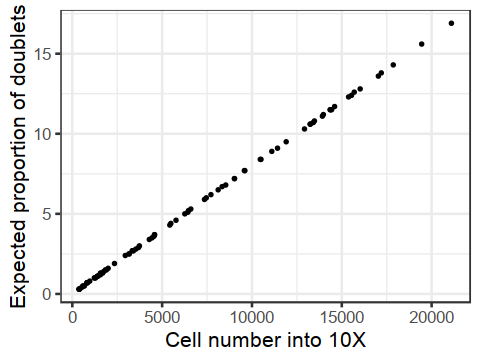

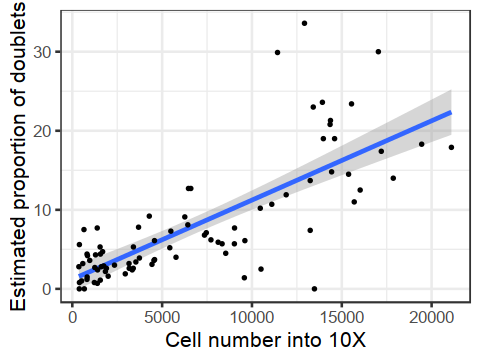

In [210]:
library(ggrepel)

options(repr.plot.height = 3, repr.plot.width = 4)
ggplot(para, aes(cell_number, expected_proportion)) +
  labs(x = "Cell number into 10X", y = "Expected proportion of doublets") +
  geom_point(size = 0.5) +
  theme_bw(base_size = 12)


ggplot(para, aes(cell_number, estimated_proportion)) +
  geom_smooth(method = "lm") +
#   geom_text_repel(
#     data = para[which(para$sample == "BRI-633R"),],
#     aes(label = sample),
#     size = 3, 
#     box.padding = unit(0.5, "lines"),
#     point.padding = unit(0.5, "lines"),
#     segment.color = 'grey50'
#   ) +
  labs(x = "Cell number into 10X", y = "Estimated proportion of doublets") +
  geom_point(size = 0.5) +
  theme_bw(base_size = 12)

In [274]:
## Load adt
adt_exprs_norm <- readRDS("adt_exprs_norm_2020-01-25.rds")
# adt_exprs_norm <- readRDS("adt_exprs_norm_filter_2020-02-18.rds")
all(meta_all$cell == colnames(adt_exprs_norm))

[1] TRUE

In [275]:
meta_all$CD19 <- adt_exprs_norm[which(rownames(adt_exprs_norm) == "CD19_prot"),]
meta_all$CD3 <- adt_exprs_norm[which(rownames(adt_exprs_norm) == "CD3_prot"),]
meta_all$CD14 <- adt_exprs_norm[which(rownames(adt_exprs_norm) == "CD14_prot"),]
meta_all$PDPN <- adt_exprs_norm[which(rownames(adt_exprs_norm) == "Podoplanin_prot"),]
meta_all$CD146 <- adt_exprs_norm[which(rownames(adt_exprs_norm) == "CD146_prot"),]
meta_all$CD56 <- adt_exprs_norm[which(rownames(adt_exprs_norm) == "CD56/NCAM_prot"),]

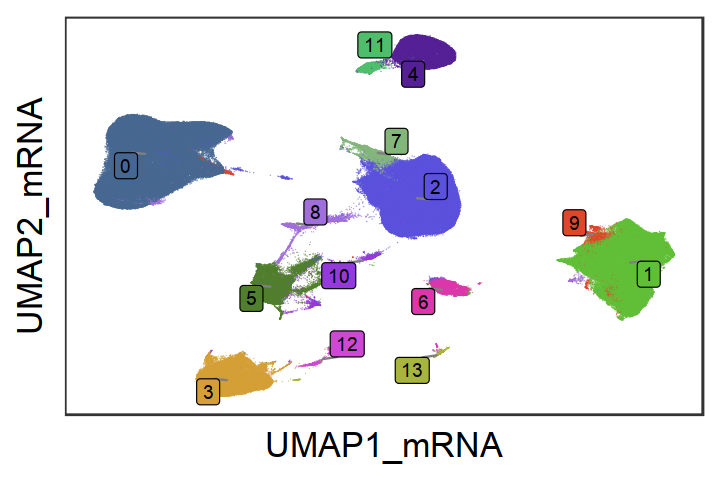

In [107]:
library(dplyr)

meta_all$res_0.20 <- as.character(meta_all$res_0.20)
meta_all$res_0.40 <- as.character(meta_all$res_0.40)
meta_all$res_0.60 <- as.character(meta_all$res_0.60)


set3 = c("#8DD3C7", "#FFFFB3", "#BEBADA", "#FB8072", "#80B1D3", "#FDB462", "#B3DE69", "#FCCDE5", "#D9D9D9", "#BC80BD", "#CCEBC5", "#FFED6F")
set2 = c("#66C2A5", "#FC8D62", "#8DA0CB", "#E78AC3", "#A6D854", "#FFD92F", "#E5C494", "#B3B3B3")
colors37 = c("#466791","#60bf37","#953ada","#4fbe6c","#ce49d3","#a7b43d","#5a51dc","#d49f36","#552095","#507f2d","#db37aa","#84b67c","#a06fda","#df462a","#5b83db","#c76c2d","#4f49a3","#82702d","#dd6bbb","#334c22","#d83979","#55baad","#dc4555","#62aad3","#8c3025","#417d61","#862977","#bba672","#403367","#da8a6d","#a79cd4","#71482c","#c689d0","#6b2940","#d593a7","#895c8b","#bd5975")


cluster_center <- meta_all %>%
                  group_by(res_0.20) %>%
                  summarise_at(vars(harmonized_UMAP1, harmonized_UMAP2), funs(median(., na.rm=TRUE)))
cluster_center <- as.data.frame(cluster_center)
cluster_center$res_0.20 <- as.character(cluster_center$res_0.20)

options(repr.plot.height = 4, repr.plot.width = 6)
ggplot(meta_all[sample(nrow(meta_all)),],
       aes(x = harmonized_UMAP1, y = harmonized_UMAP2, fill= res_0.20)
      ) +
  geom_point(size = 0.1, stroke = 0.0001, shape = 21, alpha = 0.7) +
  geom_label_repel(
    data = cluster_center,
    aes(label = res_0.20, fill = res_0.20),
#     fontface = 'bold', 
    size = 4, 
    box.padding = unit(0.2, "lines"),
    point.padding = unit(0.2, "lines"),
    segment.color = 'grey50'
  ) +
  scale_fill_manual(values = colors37, name = "") +
  labs(
      x = "UMAP1_mRNA",
      y = "UMAP2_mRNA"
      ) +
  theme_bw(base_size = 20) +
  theme(
    legend.position = "none",
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=30, face = "italic")
)

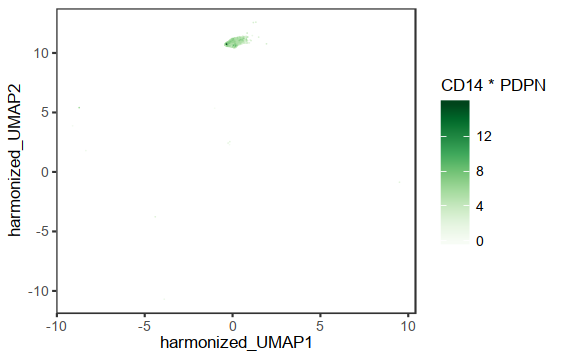

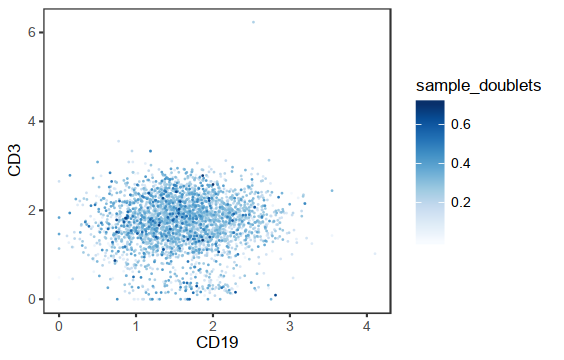

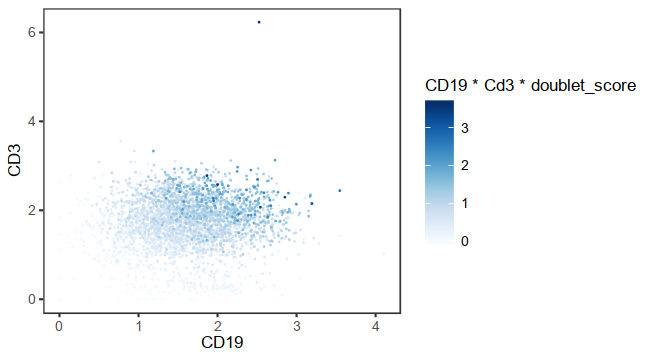

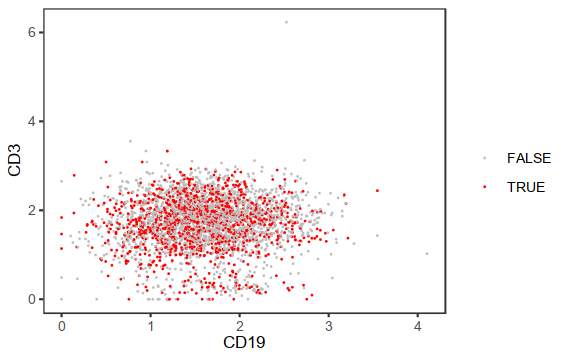

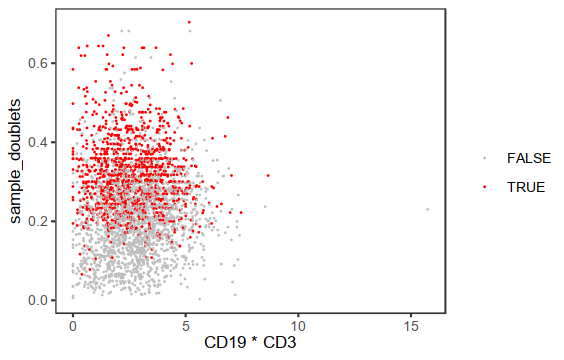

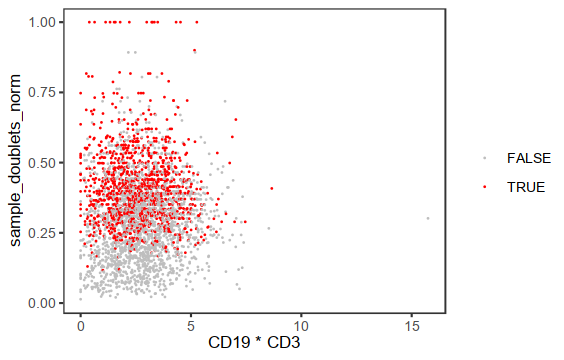

In [276]:
meta_this <- meta_all[which(meta_all$res_0.20 %in% c(11)),]
meta_this$CD19_CD3 <- meta_this$CD19 * meta_this$CD3
meta_this$CD19_CD3_doublet_score <- meta_this$CD19_CD3 * meta_this$sample_doublets


options(repr.plot.height = 3, repr.plot.width = 4.7)
ggplot() +
  geom_point(
    data = meta_this[order(meta_this$CD19_CD3),],
    mapping = aes_string(x = "harmonized_UMAP1", y = "harmonized_UMAP2", fill = "CD19_CD3"),
    size = 0.2, stroke = 0.0001, shape = 21
  ) +
  scale_fill_gradientn(
      colours = colorRampPalette(RColorBrewer::brewer.pal(9, "Greens"))(9)[1:9],
      name = "CD14 * PDPN"
  ) +
  theme_bw(base_size = 10) +
  theme(
#     legend.position = "none",
#     axis.text = element_blank(),
#     axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=10)
  )

ggplot() +
  geom_point(
    data = meta_this[order(meta_this$sample_doublets),],
    mapping = aes_string(x = "CD19", y = "CD3", fill = "sample_doublets"),
    size = 0.5, stroke = 0.0001, shape = 21
  ) +
  scale_fill_gradientn(
      colours = colorRampPalette(RColorBrewer::brewer.pal(9, "Blues"))(9)[1:9]
  ) +
  theme_bw(base_size = 10) +
  theme(
#     legend.position = "none",
#     axis.text = element_blank(),
#     axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=10)
  )

options(repr.plot.height = 3, repr.plot.width = 5.5)
ggplot() +
  geom_point(
    data = meta_this[order(meta_this$CD19_CD3_doublet_score),],
    mapping = aes_string(x = "CD19", y = "CD3", fill = "CD19_CD3_doublet_score"),
    size = 0.5, stroke = 0.0001, shape = 21
  ) +
  scale_fill_gradientn(
      colours = colorRampPalette(RColorBrewer::brewer.pal(9, "Blues"))(9)[1:9],
      name = "CD19 * Cd3 * doublet_score"
  ) +
  theme_bw(base_size = 10) +
  theme(
#     legend.position = "none",
#     axis.text = element_blank(),
#     axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=10)
  )



options(repr.plot.height = 3, repr.plot.width = 4.7)
ggplot() +
  geom_point(
    data = meta_this[order(meta_this$CD19_CD3),],
    mapping = aes_string(x = "CD19", y = "CD3", fill = "double_binary"),
    size = 0.5, stroke = 0.0001, shape = 21
  ) +
  scale_fill_manual(values = c("grey", "red"), name = "") +
  theme_bw(base_size = 10) +
  theme(
#     legend.position = "none",
#     axis.text = element_blank(),
#     axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=10)
  )



ggplot() +
  geom_point(
    data = meta_this[order(meta_this$CD19_CD3),],
    mapping = aes_string(x = "CD19_CD3", y = "sample_doublets", fill = "double_binary"),
    size = 0.5, stroke = 0.0001, shape = 21
  ) +
  scale_fill_manual(values = c("grey", "red"), name = "") +
  labs(x = "CD19 * CD3") +
  theme_bw(base_size = 10) +
  theme(
#     legend.position = "none",
#     axis.text = element_blank(),
#     axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=10)
  )


ggplot() +
  geom_point(
    data = meta_this[order(meta_this$CD19_CD3),],
    mapping = aes_string(x = "CD19_CD3", y = "sample_doublets_norm", fill = "double_binary"),
    size = 0.5, stroke = 0.0001, shape = 21
  ) +
  scale_fill_manual(values = c("grey", "red"), name = "") +
  labs(x = "CD19 * CD3") +
  theme_bw(base_size = 10) +
  theme(
#     legend.position = "none",
#     axis.text = element_blank(),
#     axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=10)
  )


# options(repr.plot.height = 25, repr.plot.width = 50)
# ggplot() +
#   geom_point(
#     data = meta_this[order(meta_this$CD19_CD3),],
#     mapping = aes_string(x = "CD19_CD3", y = "sample_doublets", fill = "double_binary"),
#     size = 0.5, stroke = 0.0001, shape = 21
#   ) +
#   facet_wrap( ~ sample, ncol = 12) +
#   scale_fill_manual(values = c("grey", "red"), name = "") +
#   labs(x = "CD19 * CD3") +
#   theme_bw(base_size = 20) +
#   theme(
# #     legend.position = "none",
# #     axis.text = element_blank(),
# #     axis.ticks = element_blank(),
#     panel.grid = element_blank(),
#     plot.title = element_text(color="black", size=20)
#   )

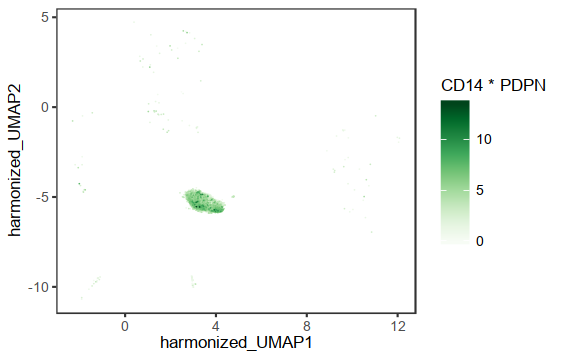

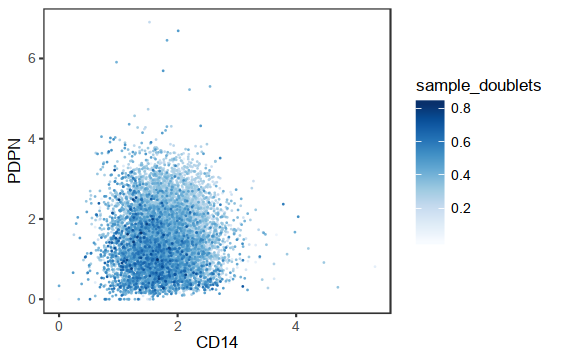

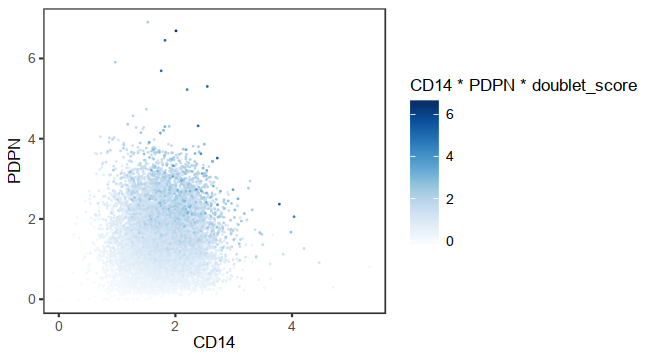

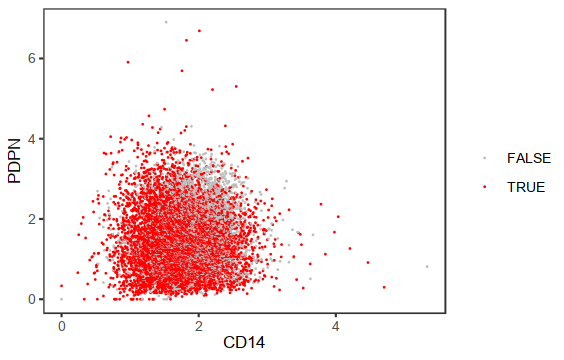

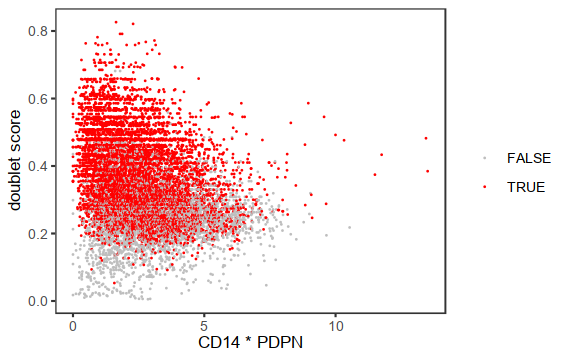

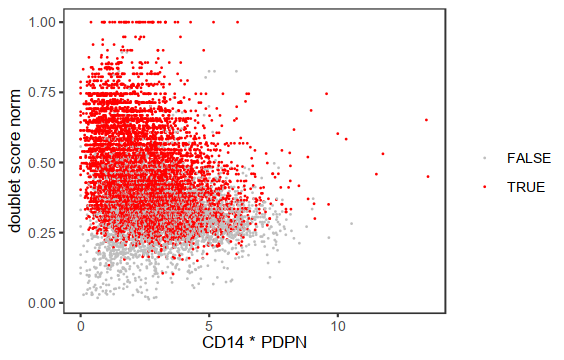

In [284]:
meta_this <- meta_all[which(meta_all$res_0.20 %in% c(6)),]
meta_this$CD14_PDPN <- meta_this$CD14 * meta_this$PDPN
meta_this$CD14_PDPN_doublet_score <- meta_this$CD14_PDPN * meta_this$sample_doublets

options(repr.plot.height = 3, repr.plot.width = 4.7)
ggplot() +
  geom_point(
    data = meta_this[order(meta_this$CD14_PDPN),],
    mapping = aes_string(x = "harmonized_UMAP1", y = "harmonized_UMAP2", fill = "CD14_PDPN"),
    size = 0.2, stroke = 0.0001, shape = 21
  ) +
  scale_fill_gradientn(
      colours = colorRampPalette(RColorBrewer::brewer.pal(9, "Greens"))(9)[1:9],
      name = "CD14 * PDPN"
  ) +
  theme_bw(base_size = 10) +
  theme(
#     legend.position = "none",
#     axis.text = element_blank(),
#     axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=10)
  )

ggplot() +
  geom_point(
    data = meta_this[order(meta_this$sample_doublets),],
    mapping = aes_string(x = "CD14", y = "PDPN", fill = "sample_doublets"),
    size = 0.5, stroke = 0.0001, shape = 21
  ) +
  scale_fill_gradientn(
      colours = colorRampPalette(RColorBrewer::brewer.pal(9, "Blues"))(9)[1:9]
  ) +
  theme_bw(base_size = 10) +
  theme(
#     legend.position = "none",
#     axis.text = element_blank(),
#     axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=10)
  )

options(repr.plot.height = 3, repr.plot.width = 5.5)
ggplot() +
  geom_point(
    data = meta_this[order(meta_this$CD14_PDPN_doublet_score),],
    mapping = aes_string(x = "CD14", y = "PDPN", fill = "CD14_PDPN_doublet_score"),
    size = 0.5, stroke = 0.0001, shape = 21
  ) +
  scale_fill_gradientn(
      colours = colorRampPalette(RColorBrewer::brewer.pal(9, "Blues"))(9)[1:9],
      name = "CD14 * PDPN * doublet_score"
  ) +
  theme_bw(base_size = 10) +
  theme(
#     legend.position = "none",
#     axis.text = element_blank(),
#     axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=10)
  )



options(repr.plot.height = 3, repr.plot.width = 4.7)
ggplot() +
  geom_point(
    data = meta_this[order(meta_this$CD14_PDPN),],
    mapping = aes_string(x = "CD14", y = "PDPN", fill = "double_binary"),
    size = 0.5, stroke = 0.0001, shape = 21
  ) +
  scale_fill_manual(values = c("grey", "red"), name = "") +
  theme_bw(base_size = 10) +
  theme(
#     legend.position = "none",
#     axis.text = element_blank(),
#     axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=10)
  )



ggplot() +
  geom_point(
    data = meta_this[order(meta_this$CD14_PDPN),],
    mapping = aes_string(x = "CD14_PDPN", y = "sample_doublets", fill = "double_binary"),
    size = 0.5, stroke = 0.0001, shape = 21
  ) +
  scale_fill_manual(values = c("grey", "red"), name = "") +
  labs(x = "CD14 * PDPN", y = "doublet score") +
  theme_bw(base_size = 10) +
  theme(
#     legend.position = "none",
#     axis.text = element_blank(),
#     axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=10)
  )



ggplot() +
  geom_point(
    data = meta_this[order(meta_this$CD14_PDPN),],
    mapping = aes_string(x = "CD14_PDPN", y = "sample_doublets_norm", fill = "double_binary"),
    size = 0.5, stroke = 0.0001, shape = 21
  ) +
  scale_fill_manual(values = c("grey", "red"), name = "") +
  labs(x = "CD14 * PDPN", y = "doublet score norm") +
  theme_bw(base_size = 10) +
  theme(
#     legend.position = "none",
#     axis.text = element_blank(),
#     axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=10)
  )

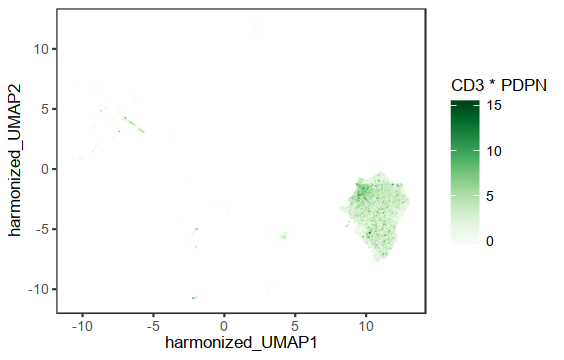

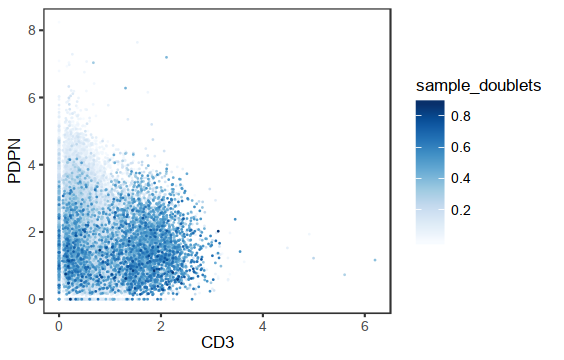

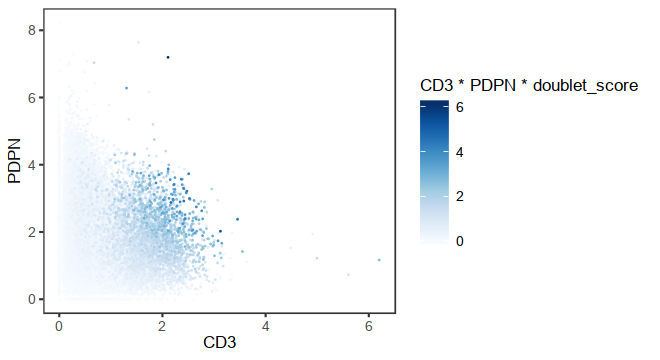

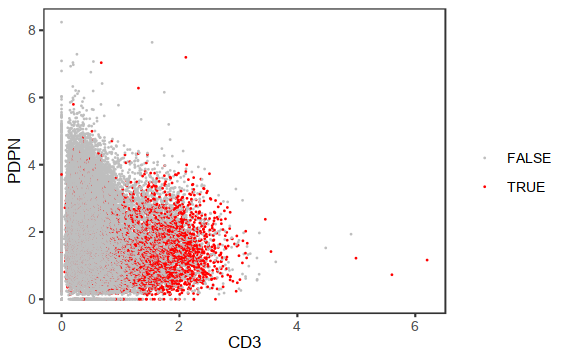

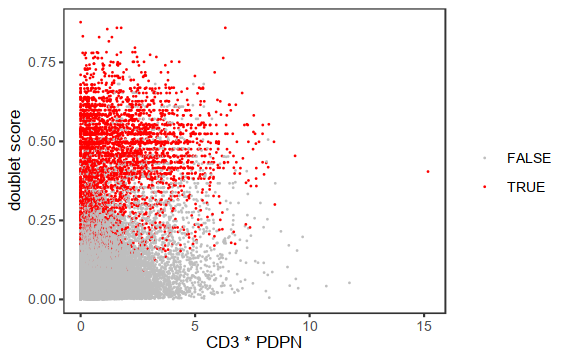

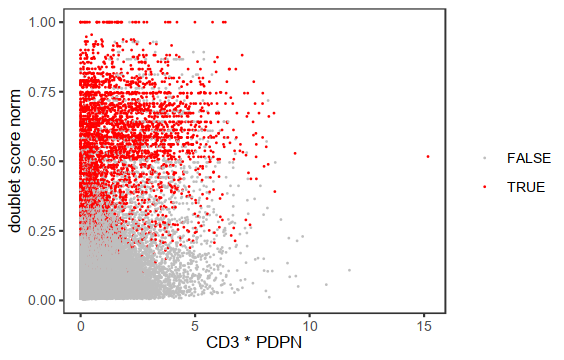

In [285]:
meta_this <- meta_all[which(meta_all$res_0.20 %in% c(9, 1)),]
meta_this$CD3_PDPN <- meta_this$CD3 * meta_this$PDPN
meta_this$CD3_PDPN_doublet_score <- meta_this$CD3_PDPN * meta_this$sample_doublets

options(repr.plot.height = 3, repr.plot.width = 4.7)
ggplot() +
  geom_point(
    data = meta_this[order(meta_this$CD3_PDPN),],
    mapping = aes_string(x = "harmonized_UMAP1", y = "harmonized_UMAP2", fill = "CD3_PDPN"),
    size = 0.2, stroke = 0.0001, shape = 21
  ) +
  scale_fill_gradientn(
      colours = colorRampPalette(RColorBrewer::brewer.pal(9, "Greens"))(9)[1:9],
      name = "CD3 * PDPN"
  ) +
  theme_bw(base_size = 10) +
  theme(
#     legend.position = "none",
#     axis.text = element_blank(),
#     axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=10)
  )

ggplot() +
  geom_point(
    data = meta_this[order(meta_this$sample_doublets),],
    mapping = aes_string(x = "CD3", y = "PDPN", fill = "sample_doublets"),
    size = 0.5, stroke = 0.0001, shape = 21
  ) +
  scale_fill_gradientn(
      colours = colorRampPalette(RColorBrewer::brewer.pal(9, "Blues"))(9)[1:9]
  ) +
  theme_bw(base_size = 10) +
  theme(
#     legend.position = "none",
#     axis.text = element_blank(),
#     axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=10)
  )

options(repr.plot.height = 3, repr.plot.width = 5.5)
ggplot() +
  geom_point(
    data = meta_this[order(meta_this$CD3_PDPN_doublet_score),],
    mapping = aes_string(x = "CD3", y = "PDPN", fill = "CD3_PDPN_doublet_score"),
    size = 0.5, stroke = 0.0001, shape = 21
  ) +
  scale_fill_gradientn(
      colours = colorRampPalette(RColorBrewer::brewer.pal(9, "Blues"))(9)[1:9],
      name = "CD3 * PDPN * doublet_score"
  ) +
  theme_bw(base_size = 10) +
  theme(
#     legend.position = "none",
#     axis.text = element_blank(),
#     axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=10)
  )



options(repr.plot.height = 3, repr.plot.width = 4.7)
ggplot() +
  geom_point(
    data = meta_this[order(meta_this$CD3_PDPN),],
    mapping = aes_string(x = "CD3", y = "PDPN", fill = "double_binary"),
    size = 0.5, stroke = 0.0001, shape = 21
  ) +
  scale_fill_manual(values = c("grey", "red"), name = "") +
  theme_bw(base_size = 10) +
  theme(
#     legend.position = "none",
#     axis.text = element_blank(),
#     axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=10)
  )


ggplot() +
  geom_point(
    data = meta_this[order(meta_this$CD3_PDPN),],
    mapping = aes_string(x = "CD3_PDPN", y = "sample_doublets", fill = "double_binary"),
    size = 0.5, stroke = 0.0001, shape = 21
  ) +
  scale_fill_manual(values = c("grey", "red"), name = "") +
  labs(x = "CD3 * PDPN", y = "doublet score") +
  theme_bw(base_size = 10) +
  theme(
#     legend.position = "none",
#     axis.text = element_blank(),
#     axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=10)
  )


ggplot() +
  geom_point(
    data = meta_this[order(meta_this$CD3_PDPN),],
    mapping = aes_string(x = "CD3_PDPN", y = "sample_doublets_norm", fill = "double_binary"),
    size = 0.5, stroke = 0.0001, shape = 21
  ) +
  scale_fill_manual(values = c("grey", "red"), name = "") +
  labs(x = "CD3 * PDPN", y = "doublet score norm") +
  theme_bw(base_size = 10) +
  theme(
#     legend.position = "none",
#     axis.text = element_blank(),
#     axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=10)
  )

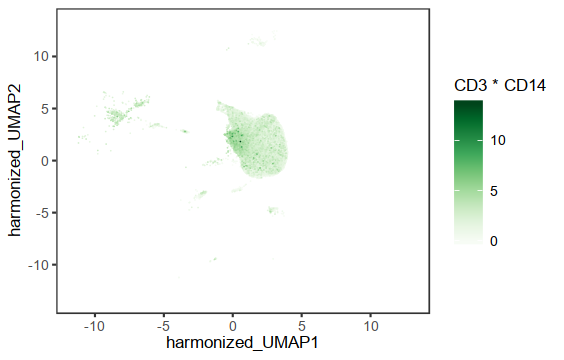

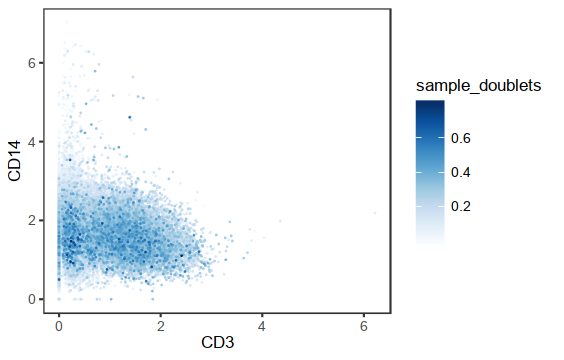


   No   Yes 
94828   157 

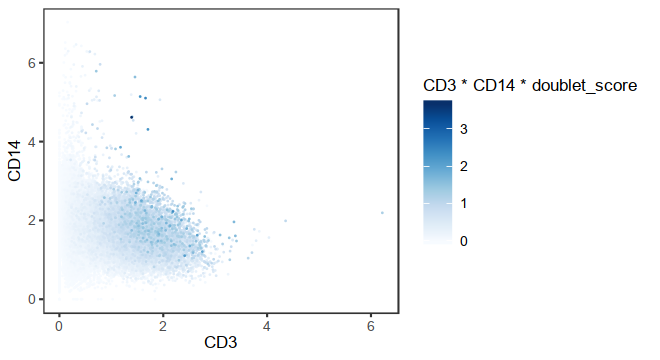

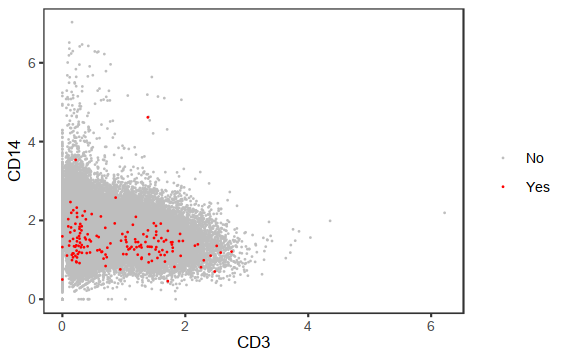

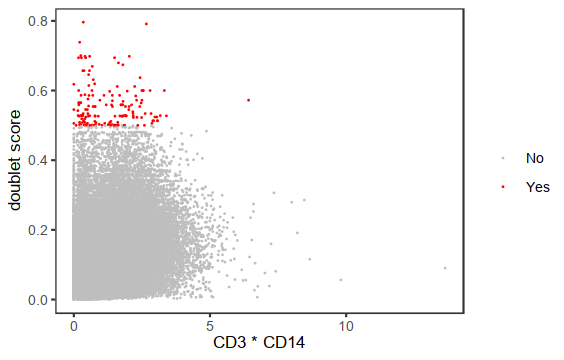

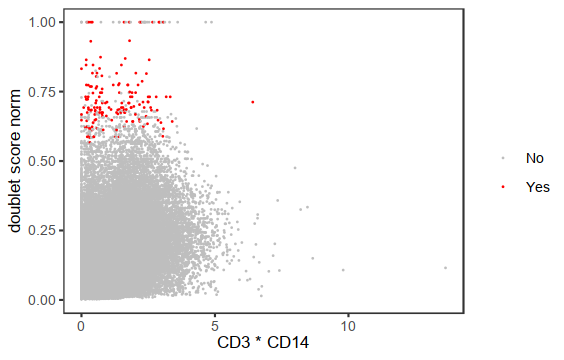

In [286]:
meta_this <- meta_all[which(meta_all$res_0.20 %in% c(7, 2)),]
meta_this$CD3_CD14 <- meta_this$CD3 * meta_this$CD14
meta_this$CD3_CD14_doublet_score <- meta_this$CD3_CD14 * meta_this$sample_doublets

options(repr.plot.height = 3, repr.plot.width = 4.7)
ggplot() +
  geom_point(
    data = meta_this[order(meta_this$CD3_CD14),],
    mapping = aes_string(x = "harmonized_UMAP1", y = "harmonized_UMAP2", fill = "CD3_CD14"),
    size = 0.2, stroke = 0.0001, shape = 21
  ) +
  scale_fill_gradientn(
      colours = colorRampPalette(RColorBrewer::brewer.pal(9, "Greens"))(9)[1:9],
      name = "CD3 * CD14"
  ) +
  scale_x_continuous(limits = c(min(meta_all$harmonized_UMAP1), max(meta_all$harmonized_UMAP1))) +
  scale_y_continuous(limits = c(min(meta_all$harmonized_UMAP2), max(meta_all$harmonized_UMAP2))) +
  theme_bw(base_size = 10) +
  theme(
#     legend.position = "none",
#     axis.text = element_blank(),
#     axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=10)
  )

ggplot() +
  geom_point(
    data = meta_this[order(meta_this$sample_doublets),],
    mapping = aes_string(x = "CD3", y = "CD14", fill = "sample_doublets"),
    size = 0.5, stroke = 0.0001, shape = 21
  ) +
  scale_fill_gradientn(
      colours = colorRampPalette(RColorBrewer::brewer.pal(9, "Blues"))(9)[1:9]
  ) +
  theme_bw(base_size = 10) +
  theme(
#     legend.position = "none",
#     axis.text = element_blank(),
#     axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=10)
  )

options(repr.plot.height = 3, repr.plot.width = 5.5)
ggplot() +
  geom_point(
    data = meta_this[order(meta_this$CD3_CD14_doublet_score),],
    mapping = aes_string(x = "CD3", y = "CD14", fill = "CD3_CD14_doublet_score"),
    size = 0.5, stroke = 0.0001, shape = 21
  ) +
  scale_fill_gradientn(
      colours = colorRampPalette(RColorBrewer::brewer.pal(9, "Blues"))(9)[1:9],
      name = "CD3 * CD14 * doublet_score"
  ) +
  theme_bw(base_size = 10) +
  theme(
#     legend.position = "none",
#     axis.text = element_blank(),
#     axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=10)
  )


meta_this$double_binary <- rep("No", nrow(meta_this))
meta_this$double_binary[which(meta_this$sample_doublets > 0.5)] <- "Yes"
table(meta_this$double_binary)

options(repr.plot.height = 3, repr.plot.width = 4.7)
ggplot() +
  geom_point(
    data = meta_this[order(meta_this$double_binary),],
    mapping = aes_string(x = "CD3", y = "CD14", fill = "double_binary"),
    size = 0.5, stroke = 0.0001, shape = 21
  ) +
  scale_fill_manual(values = c("grey", "red"), name = "") +
  theme_bw(base_size = 10) +
  theme(
#     legend.position = "none",
#     axis.text = element_blank(),
#     axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=10)
  )


ggplot() +
  geom_point(
    data = meta_this[order(meta_this$CD3_CD14),],
    mapping = aes_string(x = "CD3_CD14", y = "sample_doublets", fill = "double_binary"),
    size = 0.5, stroke = 0.0001, shape = 21
  ) +
  scale_fill_manual(values = c("grey", "red"), name = "") +
  labs(x = "CD3 * CD14", y = "doublet score") +
  theme_bw(base_size = 10) +
  theme(
#     legend.position = "none",
#     axis.text = element_blank(),
#     axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=10)
  )


ggplot() +
  geom_point(
    data = meta_this[order(meta_this$CD3_CD14),],
    mapping = aes_string(x = "CD3_CD14", y = "sample_doublets_norm", fill = "double_binary"),
    size = 0.5, stroke = 0.0001, shape = 21
  ) +
  scale_fill_manual(values = c("grey", "red"), name = "") +
  labs(x = "CD3 * CD14", y = "doublet score norm") +
  theme_bw(base_size = 10) +
  theme(
#     legend.position = "none",
#     axis.text = element_blank(),
#     axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=10)
  )